# Testing Zero-Inflated Count Matrix Factorization in Buettner data 

In [1]:
from pCMF.misc import utils, plot_utils, print_utils
from pCMF.misc.model_wrapper import ModelWrapper
from pCMF.models.pcmf import pcmf

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd
from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
data_path = '../../data/Buettner/buettner_data.csv'
labels_path = '../../data/Buettner/buettner_labels.csv'

In [3]:
X, y = pd.read_csv(data_path), pd.read_csv(labels_path)

In [4]:
X.shape

(8989, 183)

In [5]:
X

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,1,1.73630,0.73528,2.13940,1.50450,2.80570,2.53290,2.71240,0.23202,3.02960,...,2.95720,3.38160,1.52370,2.76990,3.41440,2.33600,2.37460,3.24440,0.54045,0.00000
1,2,2.59230,0.99441,1.76070,1.66730,0.73876,2.96830,2.74050,2.69670,2.73080,...,2.81940,2.81600,2.82040,2.90040,2.84250,2.62380,0.00000,2.93960,2.69260,0.00000
2,3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,4,0.00000,0.00000,2.78960,0.46165,0.00000,0.00000,1.37060,0.23202,0.39723,...,2.68590,2.87680,0.35140,1.85130,2.98300,0.89488,2.02000,2.34950,0.00000,0.00000
4,5,1.12690,0.00000,1.22350,0.61892,0.60059,1.20130,0.38103,0.00000,0.84408,...,2.14480,1.35910,0.98774,2.01000,0.96259,0.00000,0.96068,0.00000,2.53400,2.95950
5,6,2.52670,0.27582,2.01390,2.25470,2.37740,1.99050,0.49231,1.65790,2.40450,...,2.78900,1.80880,0.00000,0.67065,2.77050,2.80370,2.53480,2.96030,0.54045,2.98020
6,7,0.91252,0.00000,0.00000,0.00000,0.00000,2.20380,0.71713,0.00000,0.92837,...,0.00000,2.05110,0.77698,1.75020,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,8,2.43830,2.54700,2.39990,2.33780,2.32230,2.48980,1.61310,1.34610,2.56700,...,2.78780,3.21270,2.68970,2.78980,3.18920,3.02080,3.29530,3.10120,2.78450,2.75700
8,9,1.86580,0.00000,0.00000,0.21263,0.00000,0.00000,1.00560,2.19410,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.57730,0.00000,0.00000,0.00000,0.00000,0.00000
9,10,0.21810,0.00000,0.75735,0.00000,0.00000,1.03870,0.00000,1.00770,0.84408,...,0.00000,1.07660,0.35140,2.42230,2.29490,0.00000,1.04800,2.81490,1.45000,1.77400


In [6]:
X = X.drop(X.columns[0], axis=1)

In [7]:
X.shape

(8989, 182)

In [8]:
X = X.T

In [9]:
y = y.drop(y.columns[0], axis=1)

In [10]:
y = np.array(y).ravel()

In [11]:
K = 10

In [12]:
# Run PCA
print('Running PCA...')
obj = PCA(n_components=10)
pca = ModelWrapper(np.log(X + 1.), y, name='PCA')
pca.run(obj.fit_transform)
print('Done.\n')

Running PCA...
Done.



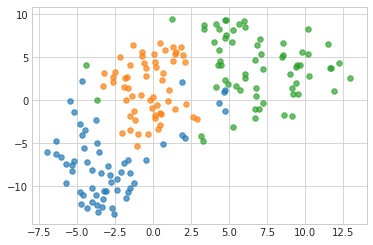

In [13]:
plot_utils.plot_tsne(pca.proj_2d, pca.c_train)

In [18]:
T = 60 * 10
S = 10
max_iter = 1000000

In [20]:
print('Running PCMF models...')
cavi = pcmf.PCMF(np.array(X), y)
cavi.run(max_iter=max_iter, max_time=T, sampling_rate=S, do_imp=False, do_holl=False, do_dll=False, verbose=True)
print('Done.\n')

Running PCMF models...
CAVI-EB:
Considering zero-inflated counts.
Considering loading sparsity.
Running CAVI-EB...
Iteration 3/1000000. Log-likelihood: -18.145. Elapsed: 0h10m41s
Done.



In [21]:
print_utils.print_model_silhouettes([cavi, pca])

Silhouette scores:
- PCA: 0.160271
- CAVI-EB: -0.0935779


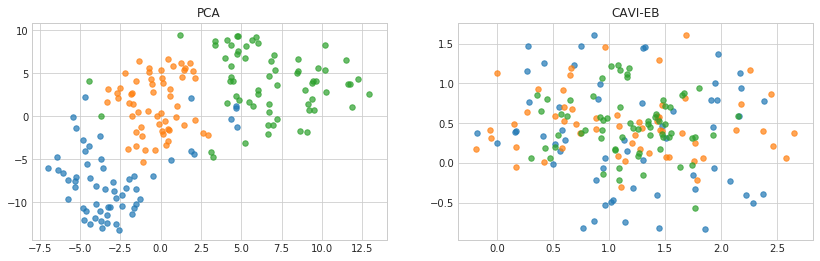

In [22]:
fig = plt.figure(figsize=(14, 4))
ax = plt.axes()
plot_utils.plot_sorted_tsnes([pca, cavi], y, ax=ax)
plt.show()